The UPOS field contains a part-of-speech tag from the universal POS tag set, while the XPOS optionally contains a language-specific (or even treebank-specific) part-of-speech / morphological tag

In [1]:
import pandas as pd
from functions import pickle_load, plot_hist, plot_2dhist
from process_conllu import ConlluDataset

In [2]:
hmm_upos_df = pd.read_csv("results/eval_hmm_upos.csv")
hmm_xpos_df = pd.read_csv("results/eval_hmm_xpos.csv")
bert_upos_df = pd.read_csv("results/eval_bert_upos.csv")
bert_xpos_df = pd.read_csv("results/eval_bert_xpos.csv")
dataset: ConlluDataset = pickle_load("checkpoints/dataset.pkl")

In [3]:
sentence_len = [len(seq) for seq in dataset.sequences]
# dropna later so pd will track which idx are dropped
hmm_upos_df["sentence length"] = sentence_len
hmm_xpos_df["sentence length"] = sentence_len
bert_upos_df["sentence length"] = sentence_len
bert_xpos_df["sentence length"] = sentence_len


# divide by zero entropy in some rows
hmm_upos_df["normalised voi"] = hmm_upos_df["normalised voi"].astype(float)
hmm_xpos_df["normalised voi"] = hmm_xpos_df["normalised voi"].astype(float)
bert_upos_df["normalised voi"] = bert_upos_df["normalised voi"].astype(float)
bert_xpos_df["normalised voi"] = hmm_upos_df["normalised voi"].astype(float)
hmm_upos_df.dropna(inplace=True)
hmm_xpos_df.dropna(inplace=True)
bert_upos_df.dropna(inplace=True)
bert_xpos_df.dropna(inplace=True)

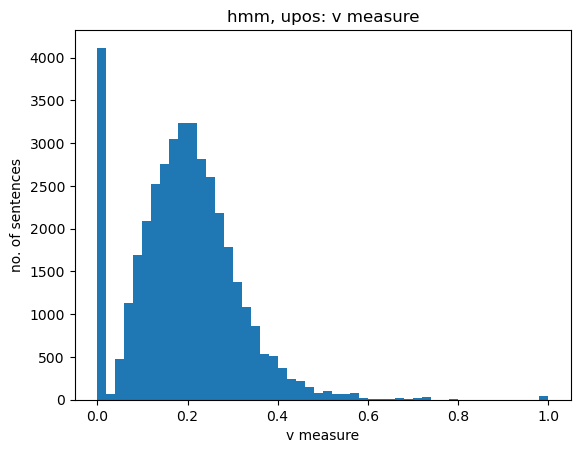

In [4]:
plot_hist(hmm_upos_df["v measure"], 50, False, "hmm, upos: v measure", "v measure", "no. of sentences")

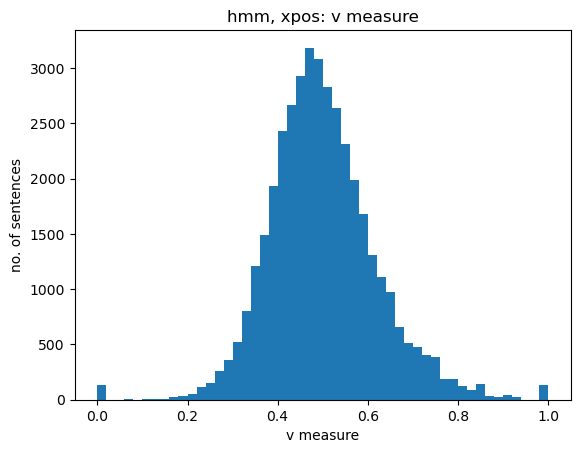

In [5]:
plot_hist(hmm_xpos_df["v measure"], 50, False, "hmm, xpos: v measure", "v measure", "no. of sentences")

I initially hypothesised forward backward algorithm to perform better on UPOS than XPOS because the transition matrix is sparser given the same dataset size. It is with great surprise that it managed to capture the more fine-grained XPOS better.

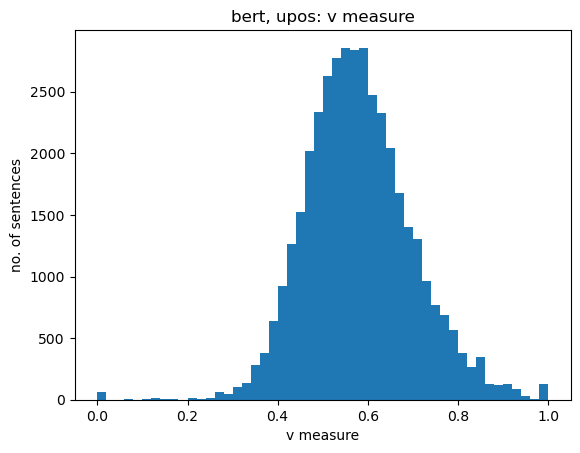

In [6]:
plot_hist(bert_upos_df["v measure"], 50, False, "bert, upos: v measure", "v measure", "no. of sentences")

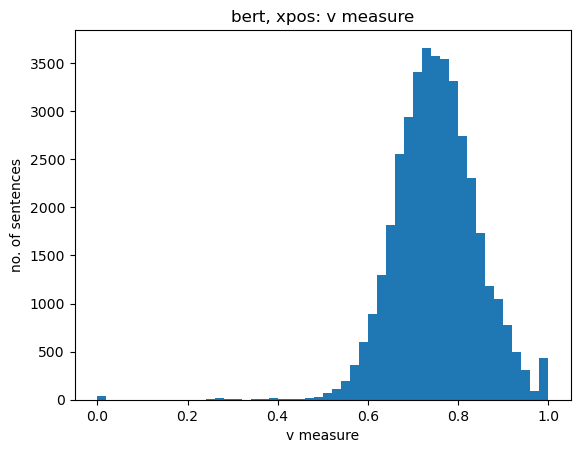

In [7]:
plot_hist(bert_xpos_df["v measure"], 50, False, "bert, xpos: v measure", "v measure", "no. of sentences")

It is likewise surprising that v measure for the more fine-grained XPOS performed better. However, it comes with no surprise that BERT captured POS better than forward backward algorithm, by a huge margin of about 0.2 in both cases.

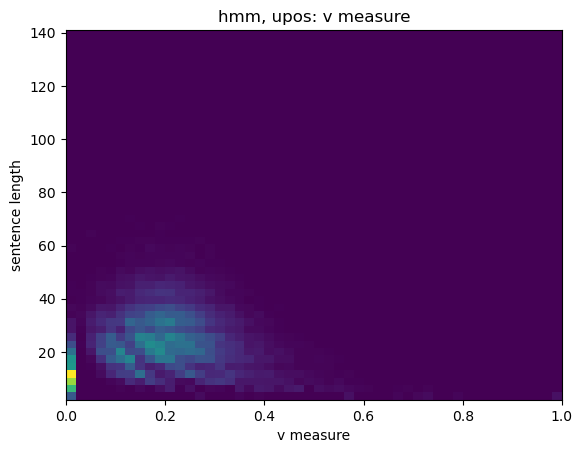

In [8]:
plot_2dhist(
  hmm_upos_df["v measure"],
  hmm_upos_df["sentence length"],
  50,
  "hmm, upos: v measure",
  "v measure",
  "sentence length")

Given the large no. of zeros in v measure for hmm, upos, it was imperative to find out if sentence lengths played any role. I hypothesised that on extremely short and long sentences it would not perform well. For extremely short sentences, the first token is difficult to predict accurately. For extremely long sentences, probabilities are very close to zero and HMM will completely fail. Moreover, Viterbi algorithm is greedy and may enter into a local minima and the errors cascade.

It was clear that for sentences up to length 22, with the distribution centred 6-8, there was a large number of sentences that completely went off track. This effect completely disappeared for longer sentences.

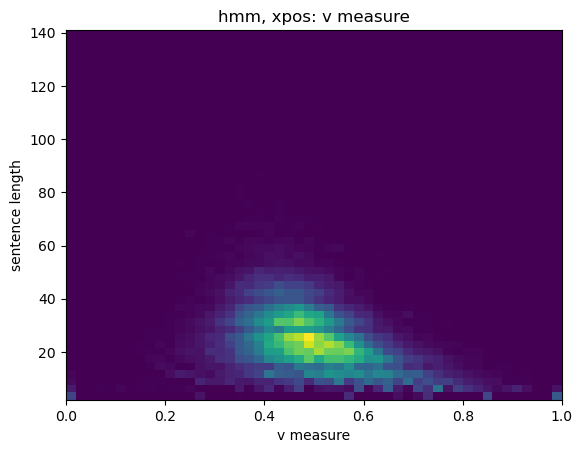

In [9]:
plot_2dhist(
  hmm_xpos_df["v measure"],
  hmm_xpos_df["sentence length"],
  50,
  "hmm, xpos: v measure",
  "v measure",
  "sentence length")

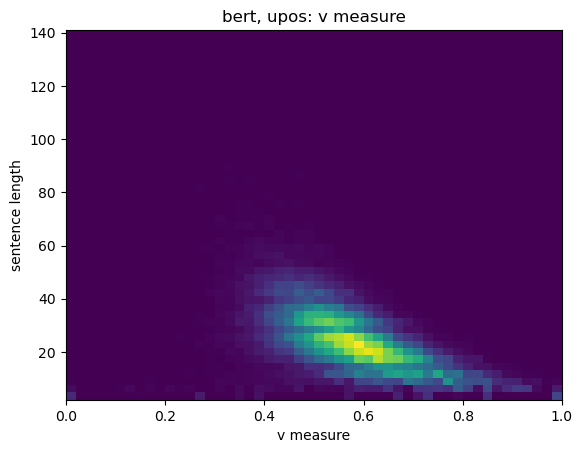

In [10]:
plot_2dhist(
  bert_upos_df["v measure"],
  bert_upos_df["sentence length"],
  50,
  "bert, upos: v measure",
  "v measure",
  "sentence length")

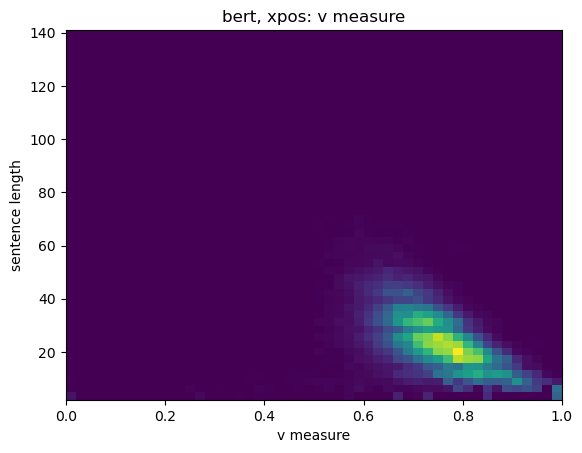

In [11]:
plot_2dhist(
  bert_xpos_df["v measure"],
  bert_xpos_df["sentence length"],
  50,
  "bert, xpos: v measure",
  "v measure",
  "sentence length")

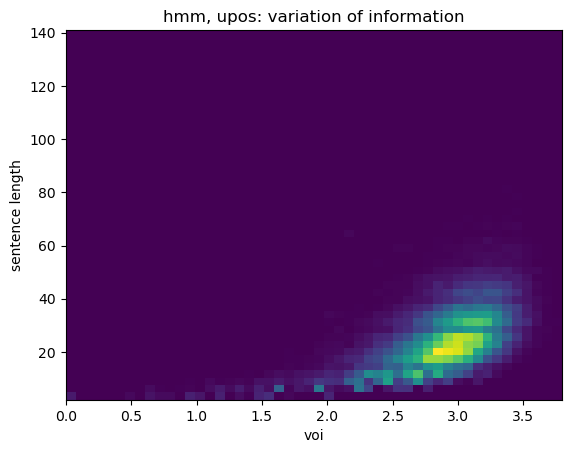

In [12]:
plot_2dhist(
  hmm_upos_df["voi"],
  hmm_upos_df["sentence length"],
  50,
  "hmm, upos: variation of information",
  "voi",
  "sentence length")

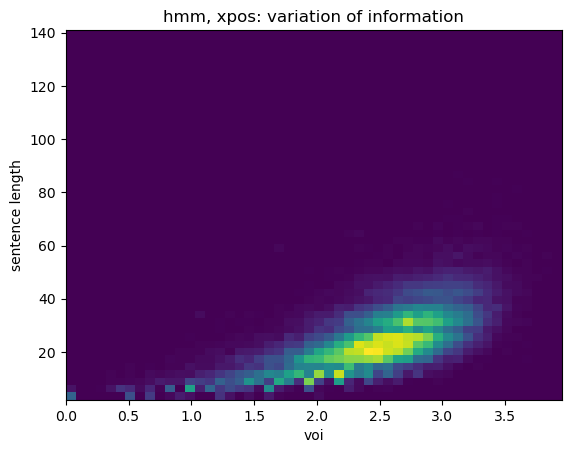

In [13]:
plot_2dhist(
  hmm_xpos_df["voi"],
  hmm_xpos_df["sentence length"],
  50,
  "hmm, xpos: variation of information",
  "voi",
  "sentence length")

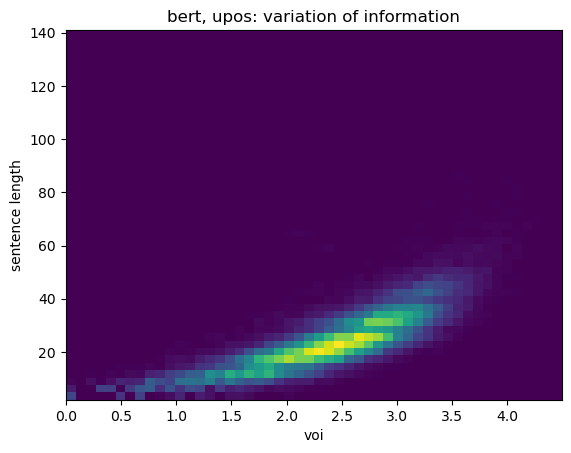

In [14]:
plot_2dhist(
  bert_upos_df["voi"],
  bert_upos_df["sentence length"],
  50,
  "bert, upos: variation of information",
  "voi",
  "sentence length")

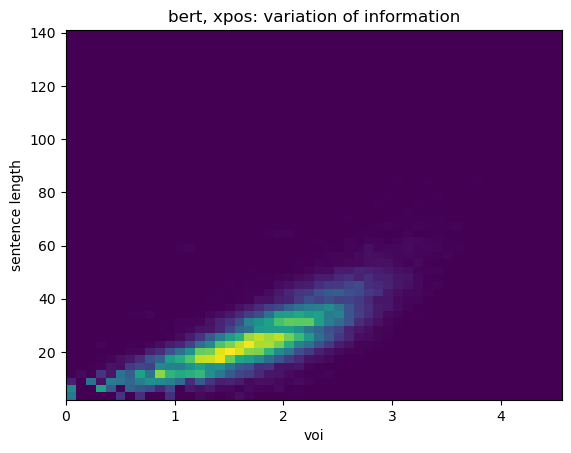

In [15]:
plot_2dhist(
  bert_xpos_df["voi"],
  bert_xpos_df["sentence length"],
  50,
  "bert, xpos: variation of information",
  "voi",
  "sentence length")

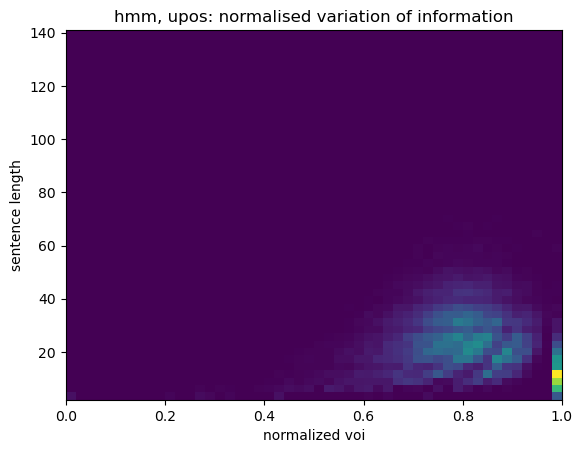

In [16]:
plot_2dhist(
  hmm_upos_df["normalised voi"],
  hmm_upos_df["sentence length"],
  50,
  "hmm, upos: normalised variation of information",
  "normalized voi",
  "sentence length")

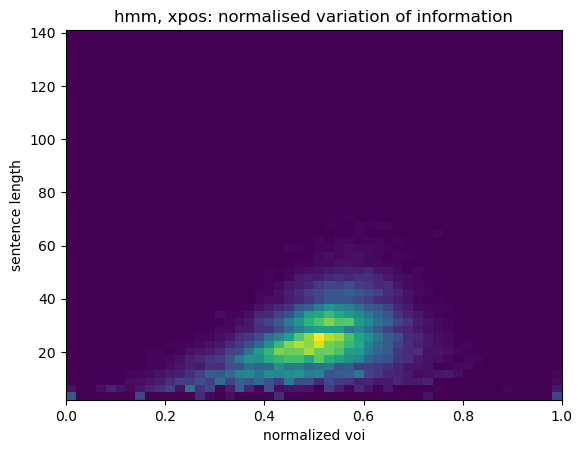

In [17]:
plot_2dhist(
  hmm_xpos_df["normalised voi"],
  hmm_xpos_df["sentence length"],
  50,
  "hmm, xpos: normalised variation of information",
  "normalized voi",
  "sentence length")

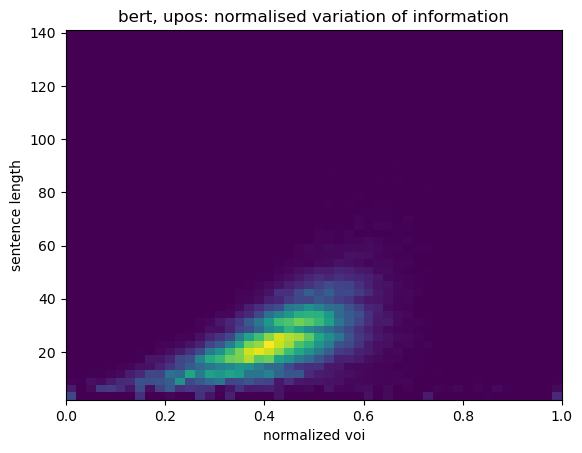

In [18]:
plot_2dhist(
  bert_upos_df["normalised voi"],
  bert_upos_df["sentence length"],
  50,
  "bert, upos: normalised variation of information",
  "normalized voi",
  "sentence length")

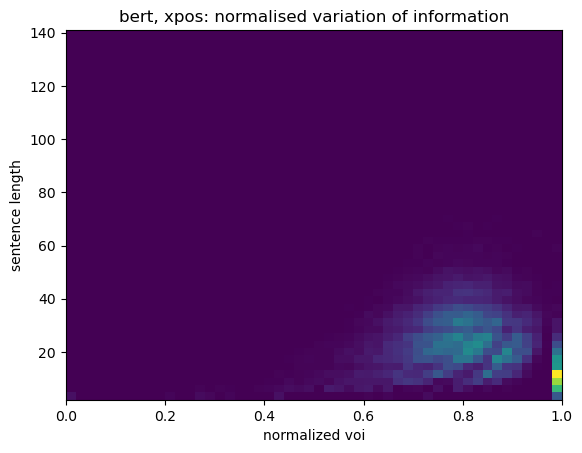

In [19]:
plot_2dhist(
  bert_xpos_df["normalised voi"],
  bert_xpos_df["sentence length"],
  50,
  "bert, xpos: normalised variation of information",
  "normalized voi",
  "sentence length")